<a href="https://colab.research.google.com/github/zhouchun0105/Citadel-Datathon-2022/blob/main/citadel_datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and Datasets

In [1]:
!pip install autogluon
from autogluon.tabular import TabularDataset, TabularPredictor

# import DiCE
!pip install dice_ml
import dice_ml
from dice_ml import Dice

from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

import pandas as pd

     |████████████████████████████████| 48 kB 540 kB/s 
     |████████████████████████████████| 133 kB 10.1 MB/s 
     |████████████████████████████████| 188 kB 45.8 MB/s 
     |████████████████████████████████| 59 kB 5.5 MB/s 
     |████████████████████████████████| 267 kB 44.0 MB/s 
     |████████████████████████████████| 38.1 MB 1.7 MB/s 
     |████████████████████████████████| 1.0 MB 43.7 MB/s 
     |████████████████████████████████| 802 kB 40.0 MB/s 
     |████████████████████████████████| 132 kB 72.6 MB/s 
     |████████████████████████████████| 54.7 MB 1.2 MB/s 
     |████████████████████████████████| 296 kB 71.1 MB/s 
     |████████████████████████████████| 166.7 MB 17 kB/s 
     |████████████████████████████████| 76.6 MB 1.2 MB/s 
     |████████████████████████████████| 2.0 MB 49.2 MB/s 
     |████████████████████████████████| 188 kB 70.5 MB/s 
     |████████████████████████████████| 431 kB 72.1 MB/s 
     |████████████████████████████████| 4.3 MB 34.8 MB/s 
     |████████████

     |████████████████████████████████| 242 kB 5.1 MB/s 


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
df = pd.read_csv('/content/drive/MyDrive/Final_Data_Collection/Diabetes_Data_1999_2008.csv',na_values=['?'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [69]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# Data Cleaning

In [71]:
#drop unused features
df.drop(["encounter_id", "patient_nbr", "weight", "payer_code", "medical_specialty", "change", "diabetesMed"], axis=1, inplace=True)

In [72]:
df.dropna(axis=0, inplace=True)

In [73]:
#process discharge_disposition_id
null_li = [18, 25, 26]
discharge_li = [11, 19, 20, 21]
alive_li = [1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,22,23,24,30,27,28,29]  

df['discharge_disposition_id']=df.discharge_disposition_id.replace(null_li, "UNKNOWN")
df['discharge_disposition_id']=df.discharge_disposition_id.replace(discharge_li, "ALIVE")
df['discharge_disposition_id']=df.discharge_disposition_id.replace(alive_li, "EXPIRED")

df['discharge_disposition_id'].value_counts()

EXPIRED    91872
UNKNOWN     4565
ALIVE       1616
Name: discharge_disposition_id, dtype: int64

In [74]:
#process admission_type_id
df['admission_type_id']=df.admission_type_id.replace({1:2 , 2:3, 3:4, 4:4, 5:5, 6:5, 7:1, 8:5})
df['admission_type_id'].value_counts()

2    52178
4    18204
3    17543
5    10108
1       20
Name: admission_type_id, dtype: int64

In [75]:
#process readmitted
df['readmitted']=df.readmitted.replace({'NO': 0 , '>30': 1, '<30': 2})
df['readmitted'].value_counts()

0    52338
1    34649
2    11066
Name: readmitted, dtype: int64

In [76]:
#process age
df['age']=df.age.replace({'[0-10)':0,'[10-20)':1, '[20-30)':2, '[30-40)':3, '[40-50)':4, '[50-60)':5,
       '[60-70)':6, '[70-80)':7, '[80-90)':8, '[90-100)':9})
df['age'].value_counts()

7    25306
6    21809
8    16702
5    16697
4     9265
3     3548
9     2717
2     1478
1      466
0       65
Name: age, dtype: int64

In [77]:
#process admission_source_id
df['admission_source_id'] = df.admission_source_id.replace([1,2,3],'Referral')
df['admission_source_id'] = df.admission_source_id.replace([4,5,6,10,18,22,25,26],'Transfer')
df['admission_source_id'] = df.admission_source_id.replace([9,15,17,20,21],'Unknown')
df['admission_source_id'] = df.admission_source_id.replace([11,12,13,14,23,24],'New_Born')
df['admission_source_id'] = df.admission_source_id.replace({7:'ER', 8:'CLE', 19:'Readmission'})
df['admission_source_id'].value_counts()

ER          55951
Referral    29566
Unknown      6811
Transfer     5705
CLE            15
New_Born        5
Name: admission_source_id, dtype: int64

In [78]:
#diagnosis 1
mask = {'428':'Congestive heart failure','414': 'Dissection of aorta',\
                                '786':'Respiratory abnormality','410':'Acute myocardial infarction of anterolateral wall',\
                                '486':'Pneumonia','427':'Paroxysmal supraventricular tachycardia','491':'Simple chronic bronchitis',\
                                '715':'Osteoarthrosis','682':'Cellulitis and abscess of face',\
                                '434':'Cerebral thrombosis without mention of cerebral infarction'
                                }
df['diag_1']=df.diag_1.replace(mask)
labels = list(df.diag_1.unique())
new_label = [x for x in labels if x not in mask.values()]
df['diag_1'] = df.diag_1.replace(new_label,'Others')
df.diag_1.value_counts()

Others                                                        63190
Congestive heart failure                                       6730
Dissection of aorta                                            6374
Respiratory abnormality                                        3900
Acute myocardial infarction of anterolateral wall              3514
Pneumonia                                                      3412
Paroxysmal supraventricular tachycardia                        2701
Simple chronic bronchitis                                      2210
Osteoarthrosis                                                 2073
Cerebral thrombosis without mention of cerebral infarction     1983
Cellulitis and abscess of face                                 1966
Name: diag_1, dtype: int64

In [79]:
# diagnosis 2
diag_2_df = df.groupby('diag_2').size().to_frame()
diag_2_df.columns = ['count']
diag_2_df['count'].nlargest(n=10)

diag_2
428    6517
276    6513
250    5412
427    4919
401    3613
496    3233
599    3225
403    2781
414    2574
411    2496
Name: count, dtype: int64

In [80]:
mask2 = {'276':'Hyperosmolality and/or hypernatremia','428': 'Congestive heart failure',\
                                '250':'Diabetes mellitus without mention of complication','427':'Paroxysmal supraventricular tachycardia',\
                                '401':'Malignant essential hypertension','496':'Chronic airway obstruction',\
                                '599':'Urinary tract infection','403':'Hypertensive chronic kidney disease',\
                                '414':'Coronary atherosclerosis of unspecified type of vessel',\
                                '411':'Postmyocardial infarction syndrome'
                                }
df['diag_2']=df.diag_2.replace(mask2)
labels2 = list(df.diag_2.unique())
new_label2 = [x for x in labels2 if x not in mask2.values()]
df['diag_2'] = df.diag_2.replace(new_label2,'Others')
df.diag_2.value_counts()

Others                                                    56770
Congestive heart failure                                   6517
Hyperosmolality and/or hypernatremia                       6513
Diabetes mellitus without mention of complication          5412
Paroxysmal supraventricular tachycardia                    4919
Malignant essential hypertension                           3613
Chronic airway obstruction                                 3233
Urinary tract infection                                    3225
Hypertensive chronic kidney disease                        2781
Coronary atherosclerosis of unspecified type of vessel     2574
Postmyocardial infarction syndrome                         2496
Name: diag_2, dtype: int64

In [81]:
# Diagnosis 3
diag_3_df = df.groupby('diag_3').size().to_frame()
diag_3_df.columns = ['count']
diag_3_df['count'].nlargest(n=10)

diag_3
250    11208
401     8090
276     5097
428     4491
427     3865
414     3567
496     2552
403     2322
585     1949
272     1910
Name: count, dtype: int64

In [82]:
mask3 = {'276':'Hyperosmolality and/or hypernatremia','428': 'Congestive heart failure',\
                                '250':'Diabetes mellitus without mention of complication','427':'Paroxysmal supraventricular tachycardia',\
                                '401':'Malignant essential hypertension','496':'Chronic airway obstruction',\
                                '403':'Hypertensive chronic kidney disease',\
                                '414':'Coronary atherosclerosis of unspecified type of vessel',\
                                '585':'Chronic kidney disease',\
                                '272':'Pure hypercholesterolemia'

                                }
df['diag_3']=df.diag_3.replace(mask3)
labels3 = list(df.diag_3.unique())
new_label3 = [x for x in labels3 if x not in mask3.values()]
df['diag_3'] = df.diag_3.replace(new_label3,'Others')
df.diag_3.value_counts()

Others                                                    53002
Diabetes mellitus without mention of complication         11208
Malignant essential hypertension                           8090
Hyperosmolality and/or hypernatremia                       5097
Congestive heart failure                                   4491
Paroxysmal supraventricular tachycardia                    3865
Coronary atherosclerosis of unspecified type of vessel     3567
Chronic airway obstruction                                 2552
Hypertensive chronic kidney disease                        2322
Chronic kidney disease                                     1949
Pure hypercholesterolemia                                  1910
Name: diag_3, dtype: int64

In [83]:
df[['diag_1','diag_2','diag_3']]

,diag_1,diag_2,diag_3
1,Others,Others,Others
2,Others,Diabetes mellitus without mention of complication,Others
3,Others,Others,Hypertensive chronic kidney disease
4,Others,Others,Diabetes mellitus without mention of complication
5,Dissection of aorta,Postmyocardial infarction syndrome,Diabetes mellitus without mention of complication
...,...,...,...
101761,Others,Others,Others
101762,Others,Hyperosmolality and/or hypernatremia,Others
101763,Others,Others,Others
101764,Others,Others,Others


In [84]:
dffinal=df.copy()

# Feature Grouping & Target Selection

In [85]:
#cluster into [Treatment, Outcome, Demographic]
category = {'Treatment':['admission_type_id','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone'], 
            'Demographic':['race', 'gender', 'age', 'admission_source_id','diag_1','diag_2','diag_3','number_diagnoses','max_glu_serum','A1Cresult','num_lab_procedures','num_procedures','num_medications'],
            'Outcome':['discharge_disposition_id','time_in_hospital', 'number_outpatient','number_emergency','number_inpatient','readmitted']}

In [89]:
df=dffinal.copy()
outcome_name = "readmitted" #CHANGE THIS FOR OTHER PREDICTIVE TASKS
continuous_features = ['age', 'num_lab_procedures','num_procedures','num_medications','number_diagnoses']
for col in list(df.columns):
  if col not in continuous_features:
    if col!=outcome_name:
      df[col] = df[col].astype(str)
target = df[outcome_name]
dropdf = df.drop(category["Outcome"], axis=1)
dropdf[outcome_name]=df[outcome_name]

# Split data into train and test for later use in counterfactuals
datasetX = dropdf.drop(outcome_name, axis=1)
dropdf=dropdf.copy()
x_train, x_test, y_train, y_test = train_test_split(datasetX,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=target)

categorical_features = x_train.columns.difference(continuous_features)

In [107]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
clusteringdf=df[category["Outcome"]]
encoder=preprocessing.LabelEncoder()

df = pd.get_dummies(data, columns = categorical_features)
for col in df.columns:
  df[col] = encoder.fit_transform(df[col])


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.007s...
[t-SNE] Computed neighbors for 3000 samples in 0.508s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 0.642387
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.206955
[t-SNE] KL divergence after 5000 iterations: 0.808921


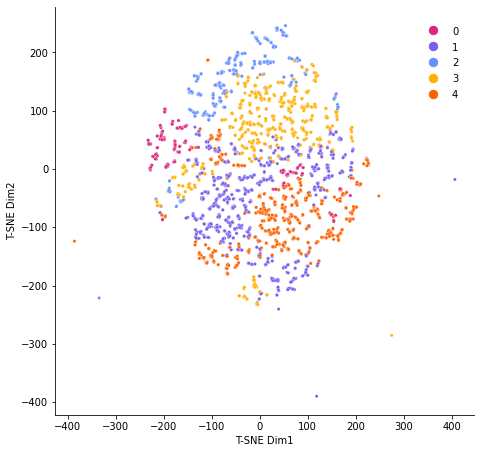

In [132]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
numslice=3000
dfslice=df.iloc[:numslice,:]
dropdfslice=dffinal.iloc[:numslice,:]
kmeans = KMeans(n_clusters=5, random_state=0).fit(dfslice)
tsne = TSNE(n_components=2, verbose=1, perplexity=2, n_iter=5000)
tsne_result = tsne.fit_transform(dfslice)
resdf=pd.DataFrame()
resdf['dim1'] = tsne_result[:,0]
resdf['dim2'] = tsne_result[:,1] 
# resdf['class'] = dropdfslice["readmitted"]
resdf['class'] = kmeans.labels_
palette=["#DC267F", "#785EF0", "#648FFF", "#FFB000", "#FE6100"]
palette=palette[:resdf["class"].nunique()]
# print(resdf["class"].nunique())
# print(palette)
plt.figure(figsize=(7.5,7.5))
ax=sns.scatterplot(
    x="dim1", y="dim2",
    hue="class",
#     palette=sns.color_palette("hls", 20),
    # 
    palette=palette,
    data=resdf,
    # legend="off",
    alpha=1,
    s=10
)
    # ax.set_title(title)
ax.legend(labelspacing=0.1,handletextpad=0.1,markerscale=1.4,fontsize='xx-large',frameon=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("T-SNE Dim1")
ax.set_ylabel("T-SNE Dim2")
plt.setp(ax.get_legend().get_texts(), fontsize='10') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='12') # for legend title
plt.show()

# AutoML Fitting

In [34]:
train_data, test_data, _, _ = train_test_split(dropdf,target,test_size=0.2,random_state=0,stratify=target)
predictor = TabularPredictor(label=outcome_name).fit(train_data=train_data)
predictions = predictor.predict(test_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20220409_162941/"
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220409_162941/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    78442
Train Data Columns: 37
Label Column: discharge_disposition_id
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == object).
	3 unique label values:  ['EXPIRED', 'ALIVE', 'UNKNOWN']
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 3
Using Feature Generators to prepr

In [35]:
class predictor_wrapper_class(object):
    def __init__(self, predictor):
        self.predictor = predictor
    def predict_proba(self, x):
        return self.predictor.predict_proba(x).values
    def predict(self, x):
        return self.predictor.predict(x).values
predictor_wrapper=predictor_wrapper_class(predictor)

# Counterfactuals

In [134]:


# We create the preprocessing pipelines for both numeric and categorical data.
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

transformations = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, continuous_features),
        ('cat', categorical_transformer, categorical_features)])
# clf = Pipeline(steps=[('preprocessor', transformations),
#                            ('classifier', RandomForestClassifier())])
# model = clf.fit(x_train, y_train)

In [ ]:
d = dice_ml.Data(dataframe=dropdf,
                      continuous_features=continuous_features,
                      outcome_name=outcome_name)

# We provide the type of model as a parameter (model_type)
m = dice_ml.Model(model=predictor_wrapper, backend="sklearn", model_type='classifier')
# m = dice_ml.Model(model=model, backend="sklearn", model_type='classifier')
dice_model = Dice(d, m, method="genetic")

In [ ]:
features_to_vary=category["Treatment"]
queries = x_test[100:101]
counterfactuals = dice_model.generate_counterfactuals(queries, total_CFs=5, desired_class=0, features_to_vary=features_to_vary)
# counterfactuals.visualize_as_dataframe(show_only_changes=True)
from IPython.display import display, HTML
for i in range(len(counterfactuals.cf_examples_list)):
  cf_example = counterfactuals.cf_examples_list[i]
  print(cf_example)
  querydf = cf_example.test_instance_df
  resdf = cf_example.final_cfs_df
  resdf.head()
  dropcols=[]
  for col in list(resdf.columns):
    if resdf[col].values[0]==querydf[col].values[0]:
      if resdf[col].nunique()==1:
        dropcols.append(col)
  resdf.drop(dropcols, axis=1, inplace=True)
  display(querydf[resdf.columns])
  display(resdf)

In [ ]:
imp = dice_model.local_feature_importance(query_instance, cf_examples_list=counterfactuals.cf_examples_list)
print(imp.local_importance)